In [6]:
import qiskit
from qiskit.providers import BaseBackend
from qiskit.providers.ibmq import IBMQBackend

In [9]:
from dc_qiskit_qml.feature_maps import NormedAmplitudeEncoding
from dc_qiskit_qml.distance_based.hadamard import QmlHadamardNeighborClassifier
from dc_qiskit_qml.distance_based.hadamard.state import QmlGenericStateCircuitBuilder
from dc_qiskit_qml.distance_based.hadamard.state.sparsevector import MöttönenStatePreparation

initial_state_builder = QmlGenericStateCircuitBuilder(MöttönenStatePreparation())
feature_map = NormedAmplitudeEncoding()

execution_backend: BaseBackend = qiskit.Aer.get_backend('qasm_simulator')
qml = QmlHadamardNeighborClassifier(backend=execution_backend,
                                    shots=8192, 
                                    classifier_circuit_factory=initial_state_builder,
                                    feature_map=feature_map)

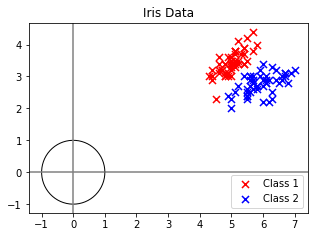

In [10]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

X, y = load_iris(True)
X = np.asarray([x[0:2] for x, yy in zip(X, y) if yy != 2])
y = np.asarray([yy for x, yy in zip(X, y) if yy != 2])

figure = plt.figure(figsize=(5,3.5), num=2)
sub1 = figure.subplots(nrows=1, ncols=1)

class_0_data = np.asarray([X[i] for i in range(len(X)) if y[i] == 0])
class_1_data = np.asarray([X[i] for i in range(len(X)) if y[i] == 1])

class_0 = sub1.scatter(class_0_data[:,0], class_0_data[:,1], color='red', marker='x', s=50)
class_1 = sub1.scatter(class_1_data[:,0], class_1_data[:,1], color='blue', marker='x', s=50)
sub1.plot([np.cos(x) for x in np.arange(0, 2*np.pi + 0.1, 0.1)], [np.sin(x) for x in np.arange(0, 2*np.pi + 0.1, 0.1)], 
          color='black', linewidth=1)
sub1.set_title("Iris Data")
sub1.legend([class_0, class_1], ["Class 1", "Class 2"])
sub1.axvline(color='gray')
sub1.axhline(color='gray')

In [13]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler',  StandardScaler()), 
    ('l2norm', Normalizer(norm='l2', copy=True)),
    ('qml', qml)
])

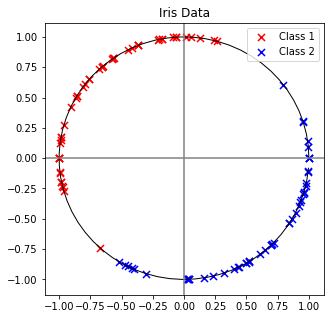

In [14]:
_X = pipeline.fit_transform(X, y)

figure = plt.figure(figsize=(5,5), num=2)
sub1 = figure.subplots(nrows=1, ncols=1)

class_0_data = np.asarray([_X[i] for i in range(len(X)) if y[i] == 0])
class_1_data = np.asarray([_X[i] for i in range(len(X)) if y[i] == 1])

class_0 = sub1.scatter(class_0_data[:,0], class_0_data[:,1], color='red', marker='x', s=50)
class_1 = sub1.scatter(class_1_data[:,0], class_1_data[:,1], color='blue', marker='x', s=50)
sub1.plot([np.cos(x) for x in np.arange(0, 2*np.pi, 0.1)], [np.sin(x) for x in np.arange(0, 2*np.pi, 0.1)], 
          color='black', linewidth=1)
sub1.set_title("Iris Data")
sub1.legend([class_0, class_1], ["Class 1", "Class 2"])
sub1.axvline(color='gray')
sub1.axhline(color='gray')

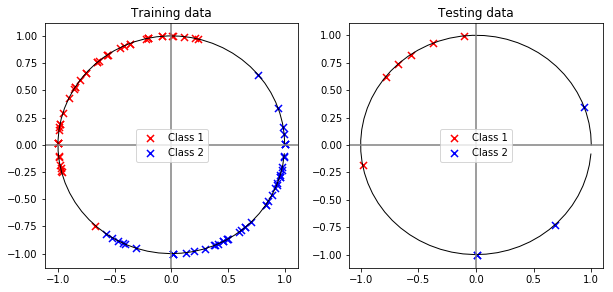

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
_X_train = pipeline.fit_transform(X_train, y_train)
_X_test = pipeline.transform(X_test)

figure = plt.figure(figsize=(10,4.5), num=2)
sub1, sub2 = figure.subplots(nrows=1, ncols=2)

class_0_data = np.asarray([_X_train[i] for i in range(len(X_train)) if y_train[i] == 0])
class_1_data = np.asarray([_X_train[i] for i in range(len(X_train)) if y_train[i] == 1])

class_0 = sub1.scatter(class_0_data[:,0], class_0_data[:,1], color='red', marker='x', s=50)
class_1 = sub1.scatter(class_1_data[:,0], class_1_data[:,1], color='blue', marker='x', s=50)
sub1.plot([np.cos(x) for x in np.arange(0, 2*np.pi, 0.1)], [np.sin(x) for x in np.arange(0, 2*np.pi, 0.1)], 
          color='black', linewidth=1)
sub1.set_title("Training data")
sub1.legend([class_0, class_1], ["Class 1", "Class 2"])
sub1.axvline(color='gray')
sub1.axhline(color='gray')

class_0_data_test = np.asarray([_X_test[i] for i in range(len(X_test)) if y_test[i] == 0])
class_1_data_test = np.asarray([_X_test[i] for i in range(len(X_test)) if y_test[i] == 1])

class_0 = sub2.scatter(class_0_data_test[:,0], class_0_data_test[:,1], color='red', marker='x', s=50)
class_1 = sub2.scatter(class_1_data_test[:,0], class_1_data_test[:,1], color='blue', marker='x', s=50)
sub2.plot([np.cos(x) for x in np.arange(0, 2*np.pi, 0.1)], [np.sin(x) for x in np.arange(0, 2*np.pi, 0.1)], 
          color='black', linewidth=1)
sub2.set_title("Testing data")
sub2.legend([class_0, class_1], ["Class 1", "Class 2"])
sub2.axvline(color='gray')
sub2.axhline(color='gray')

In [18]:
len(X_train), np.ceil(np.log2(len(X_train)))

(90, 7.0)

## Results

In [19]:
pipeline.fit(X_train, y_train)
pipeline.predict(X_test), y_test

C:\Users\cncen\Anaconda3\lib\site-packages\marshmallow\schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning


([1, 1, 1, 0, 0, 0, 0, 1, 0, 0], array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0]))

In [10]:
list(zip(prediction, y_test))

[(1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0)]

In [11]:
"Test Accuracy: {}".format(
    sum([1 if p == t else 0 for p, t in zip(prediction, y_test)])/len(prediction)
)

'Test Accuracy: 1.0'

In [115]:
prediction_train = qml.predict(X_train)

In [117]:
"Train Accuracy: {}".format(
    sum([1 if p == t else 0 for p, t in zip(prediction_train, y_train)])/len(prediction_train)
)

'Train Accuracy: 0.9222222222222223'

In [ ]:
list(zip(prediction_train, y_train))

## Comparison to the theoretical Values

In [12]:
for i in range(len(X_test)):
    print("{:.4f} ~~ {:.4f}".format(qml.last_predict_p_acc[i], 
                                    QmlHadamardNeighborClassifier.p_acc_theory(X_train, y_train, X_test[i])))

0.5098 ~~ 0.5081
0.5167 ~~ 0.5204
0.4786 ~~ 0.4848
0.5110 ~~ 0.5128
0.4768 ~~ 0.4841
0.4836 ~~ 0.4908
0.4838 ~~ 0.4945
0.5151 ~~ 0.5203
0.4745 ~~ 0.4803
0.4835 ~~ 0.4881


In [13]:
for i in range(len(X_test)):
    print("{:.4f} ~~ {:.4f}".format(qml.last_predict_probability[i], 
                                   QmlHadamardNeighborClassifier.p_label_theory(X_train, y_train, X_test[i], prediction[i])))

0.8889 ~~ 0.8942
0.7567 ~~ 0.7683
0.7279 ~~ 0.7109
0.7191 ~~ 0.7204
0.8502 ~~ 0.8480
0.8879 ~~ 0.8838
0.8854 ~~ 0.8823
0.7709 ~~ 0.7694
0.7834 ~~ 0.7846
0.8808 ~~ 0.8764


In [21]:
feature_map = NormedAmplitudeEncoding()

train_data = [feature_map.map(x) for x in X_train]
input_data = feature_map.map(X_test[0])

initial_state_builder.build_circuit('test', train_data, y_train, input_data)
state_vector = initial_state_builder.get_last_state_vector()

In [25]:
state_vector

<1024x1 sparse matrix of type '<class 'numpy.complex128'>'
	with 360 stored elements in Dictionary Of Keys format>

## Noise analysis

In [17]:
qobj = qiskit.compile(qml._last_predict_circuits[0], execution_backend)

"noise_params": {
    "U": {
        "p_depol": 0.001,
        "p_pauli": [0, 0, 0.01],
        "gate_time": 1,
        "U_error": [
            [[1, 0], [0, 0]],

            [[0, 0], [0.995004165, 0.099833417]]
        ]
    }
}

In [41]:
sum([len(d.data) for d in qml._last_predict_circuits[0].data[0].data])

# from qiskit.tools.visualization import circuit_drawer

# qobj = qiskit.compile(qml._last_predict_circuits[0], execution_backend)
# cqc = qiskit.load_qasm_string(qobj.experiments[0].as_dict()['header']['compiled_circuit_qasm'])

# circuit_drawer(cqc)

4090